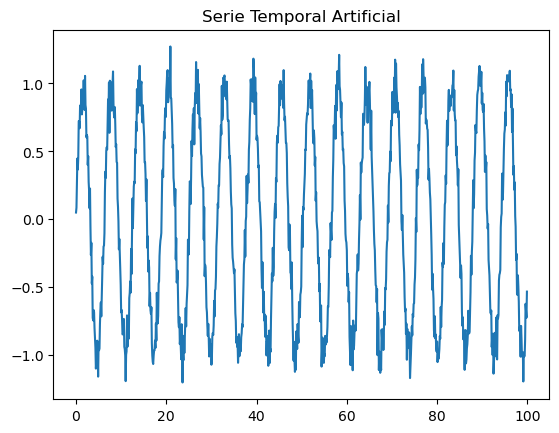

Epoch 1/100
25/25 [==============================] - 3s 49ms/step - loss: 0.2257 - val_loss: 0.0673
Epoch 2/100
25/25 [==============================] - 1s 41ms/step - loss: 0.0400 - val_loss: 0.0285
Epoch 3/100
25/25 [==============================] - 1s 44ms/step - loss: 0.0180 - val_loss: 0.0063
Epoch 4/100
25/25 [==============================] - 1s 48ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 5/100
25/25 [==============================] - 1s 48ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 6/100
25/25 [==============================] - 1s 51ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 7/100
25/25 [==============================] - 1s 52ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 8/100
25/25 [==============================] - 1s 50ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 9/100
25/25 [==============================] - 1s 47ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/100
25/25 [==============================] - 1s 52ms/step - loss: 0.0020 - val_loss: 0.0018

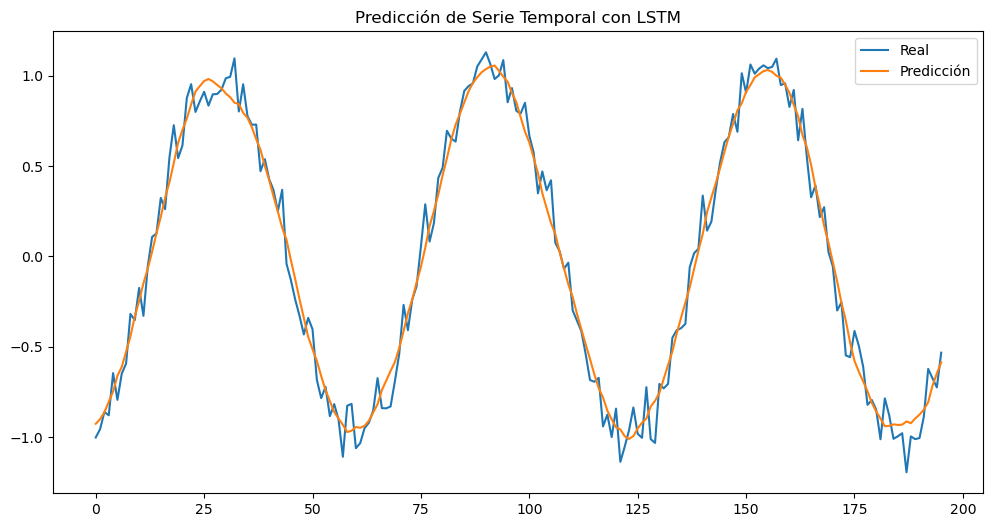

In [1]:
# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Generamos una serie temporal artificial (seno con ruido)
np.random.seed(42)
time = np.arange(0, 100, 0.1)
series = np.sin(time) + np.random.normal(0, 0.1, len(time))

plt.plot(time, series)
plt.title("Serie Temporal Artificial")
plt.show()

# Preparamos los datos para LSTM
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series.reshape(-1, 1))

# Función para crear secuencias
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 20
X, y = create_sequences(series_scaled, seq_length)

# División en entrenamiento y test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenamiento
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Predicción
y_pred = model.predict(X_test)

# Inversión de escalado
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Gráfico de resultados
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test_inv)), y_test_inv, label='Real')
plt.plot(range(len(y_pred_inv)), y_pred_inv, label='Predicción')
plt.title("Predicción de Serie Temporal con LSTM")
plt.legend()
plt.show()